# Permutation tests with change scores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

This notebook will simulate a clinical trial where a placebo group and an active drug group are tested pre and post treatment. The tests will test the null hypothesis that there is no difference in the pre/post treatment change scores for each group. E.g. that the drug is no more effective than placebo.

The output of the cell below shows the simulated symptom severity scores before treatment, for each participant. E.g. before the placebo group have received the placebo treatment, and before the drug group have received the active drug treatment:

In [2]:
# setting a sample size for the simulated groups
samp_size = 80

# creating simulated pre-treatment scores for the placebo group
placebo_before = np.random.normal(100, 15, samp_size).astype('int')

print('\nPlacebo group symptom severity scores BEFORE treatment:')
display(placebo_before)

# creating simulated pre-treatment scores for the drug group
drug_before = np.random.normal(100, 15, samp_size).astype('int')

print('\nDrug group symptom severity scores BEFORE treatment:')
display(drug_before)


Placebo group symptom severity scores BEFORE treatment:


array([ 92,  95, 129, 105,  83,  91,  91, 130,  93, 116,  69, 102, 122,
        83,  98, 100,  82,  90,  90, 105, 121, 132,  97, 115, 103,  83,
        96, 105,  96, 103, 113,  98, 101,  92,  81,  89,  75,  81,  94,
       104, 108, 103,  92,  88, 115, 107, 105, 123,  89, 102, 108,  79,
        91, 106, 105, 101,  93, 103, 115,  97, 126,  88,  86, 112,  80,
        87,  89, 116, 109, 112, 117,  90, 103, 107,  59,  85, 113, 115,
       121,  93])


Drug group symptom severity scores BEFORE treatment:


array([ 89,  76, 106,  94,  88,  78, 107,  94,  96,  63, 123,  95,  95,
        77,  94, 108, 104,  75, 140,  85,  69, 104,  82,  98, 110,  74,
       114,  91, 115, 109,  76, 116, 107, 109,  97, 116,  89, 112, 105,
        87, 109,  89,  96, 103, 115, 102,  89,  88,  81,  94, 111, 104,
        64,  92,  86,  92,  93, 116, 124, 106, 101, 111, 127,  85, 116,
        75, 106, 113, 110,  89,  88,  98,  71,  93,  95,  90,  99, 118,
        84, 107])

The output of the cell below shows the symptom severity scores after treatment:

In [3]:
# creating simulated post-treatment scores for the placebo group
placebo_after = np.random.normal(95, 15, samp_size).astype('int')

print('Placebo group scores AFTER treatment:')
display(placebo_after)


# creating simulated post-treatment scores for the drug group
drug_after = np.random.normal(85, 15, samp_size).astype('int')

print('Drug group scores AFTER treatment:')
display(drug_after)

Placebo group scores AFTER treatment:


array([100,  88,  90,  81, 112,  99,  84, 100, 102,  75,  85, 108,  99,
        80,  92,  85,  83,  77,  95,  83, 113, 107,  86, 117,  70, 124,
       119, 104,  79, 107,  92,  68, 106,  97,  82,  91,  77,  76, 113,
        54, 106,  95,  88,  90, 118,  76,  94,  80,  70,  99, 115, 121,
        97, 105,  96,  96, 133,  97,  85,  87,  93,  86, 118,  77,  81,
        95, 111,  98,  59,  95, 122, 123,  91, 103, 103,  62, 114,  88,
        84,  95])

Drug group scores AFTER treatment:


array([104,  75,  96,  79,  87,  90,  88,  87,  86,  67,  79, 106,  76,
        73,  65, 100,  92, 113,  98,  93, 100, 110,  41, 107,  96,  92,
        87, 116,  79,  65,  83,  71,  85, 109,  76,  79,  92, 102,  96,
        83,  73,  74, 103,  75,  91,  81,  66, 101,  68,  74,  96, 105,
       101,  70,  76, 105,  91,  91,  83,  97,  94, 102,  85,  84,  60,
        78, 102,  69, 123,  74,  92,  53,  79,  77,  69,  71,  84,  70,
        78,  76])

The cells below show some graphical inspection of the data, using seaborn:

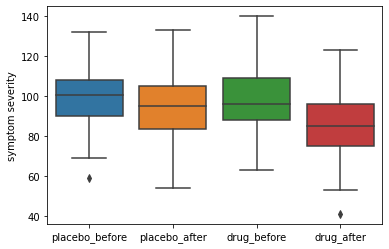

In [4]:
import seaborn as sns

# plotting the pre/post treatment scores for each group
sns.boxplot(data = [placebo_before, placebo_after, drug_before, drug_after])
# labelling the axes
plt.xticks(np.arange(4), ['placebo_before', 'placebo_after', 'drug_before', 'drug_after'])
plt.ylabel('symptom severity');

In this instance, from graphical inspection it does look like the post-treatment syptom severity is lower for the drug group than for the placebo group. It's especially informative to look at the line in the center of each boxplot, which shows the median.

# Change scores

The output of the cell below shows the change scores for each group. Generally this is calculated by subtracting the pre-treatment scores from the post-treatment scores.

In [5]:
# calculating the change scores for the placebo group
placebo_change = placebo_after - placebo_before
print('\nPlacebo group change scores:')
display(placebo_change)

# calculating the change scores for the drug group
drug_change = drug_after - drug_before
print('\nDrug group change scores:')
display(drug_change)


Placebo group change scores:


array([  8,  -7, -39, -24,  29,   8,  -7, -30,   9, -41,  16,   6, -23,
        -3,  -6, -15,   1, -13,   5, -22,  -8, -25, -11,   2, -33,  41,
        23,  -1, -17,   4, -21, -30,   5,   5,   1,   2,   2,  -5,  19,
       -50,  -2,  -8,  -4,   2,   3, -31, -11, -43, -19,  -3,   7,  42,
         6,  -1,  -9,  -5,  40,  -6, -30, -10, -33,  -2,  32, -35,   1,
         8,  22, -18, -50, -17,   5,  33, -12,  -4,  44, -23,   1, -27,
       -37,   2])


Drug group change scores:


array([ 15,  -1, -10, -15,  -1,  12, -19,  -7, -10,   4, -44,  11, -19,
        -4, -29,  -8, -12,  38, -42,   8,  31,   6, -41,   9, -14,  18,
       -27,  25, -36, -44,   7, -45, -22,   0, -21, -37,   3, -10,  -9,
        -4, -36, -15,   7, -28, -24, -21, -23,  13, -13, -20, -15,   1,
        37, -22, -10,  13,  -2, -25, -41,  -9,  -7,  -9, -42,  -1, -56,
         3,  -4, -44,  13, -15,   4, -45,   8, -16, -26, -19, -15, -48,
        -6, -31])

We can graphically inspect the change scores for each group, in the same way as for the raw scores:

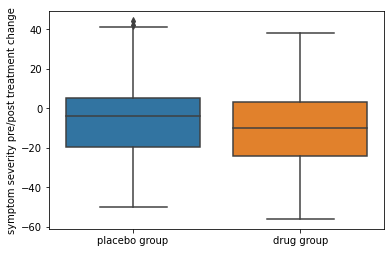

In [6]:
sns.boxplot(data = [placebo_change, drug_change])
plt.xticks(np.arange(2), ['placebo group', 'drug group'])
plt.ylabel('symptom severity pre/post treatment change');

It does look like the drug group generally have more negative change scores. This indicates a greater reduction in symptom severity in the drug group, relative to the placebo group.

We can check this further with some descriptive statistics:

In [7]:
print('The mean change for the placebo group = ', np.mean(placebo_change))

print('The mean change for the drug group = ', np.mean(drug_change))

The mean change for the placebo group =  -5.4625
The mean change for the drug group =  -11.6625


# Permutation testing the difference in mean change scores between the two groups

We can permutation test the difference in the mean change scores between the groups in a very similar way to the permutation test shown in: https://matthew-brett.github.io/cfd2020/permutation/permutation_and_t_test.html

This method shuffles the change scores themselves. There's another method, which uses only the +/- signs of the change scores, which I'll show after this.

First, let's calculate the actual difference between the mean change score of each group:

In [8]:
actual_diff = np.mean(placebo_change) - np.mean(drug_change)

print(actual_diff)

6.199999999999999


The permutation test is shown below:

In [9]:
# adpated from https://matthew-brett.github.io/cfd2020/permutation/permutation_and_t_test.html

# count the number of participants in the placebo group
n_placebo = len(placebo_change)

# pool the change scores together
pooled = np.append(placebo_change, drug_change)

# set the number of iterations for the permutation test
n_iters = 10000

# create an array to store the fake differences in the mean change scores
fake_differences = np.zeros(n_iters)

# for 10,000 iterations, shuffle the change scores around, as if there is no difference between the groups (e.g. no difference
# between the direction or magnitude of the changes in each group)
for i in np.arange(n_iters):
    shuffled = np.random.permutation(pooled)
    
    # calculate the fake difference in the mean change scores between each group
    fake_differences[i] = np.mean(shuffled[:n_placebo]) - np.mean(shuffled[n_placebo:])
    

In the familar way, we can plot the simulate sampling distribution of the fake differences in mean change scores:

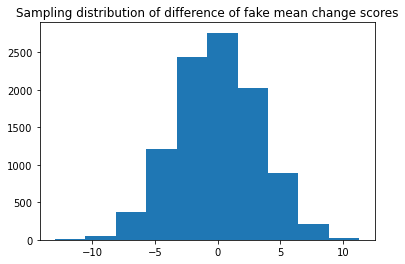

In [10]:
plt.hist(fake_differences)
plt.title('Sampling distribution of difference of fake mean change scores');

Let's plot the actual difference in mean change scores, to see how likely/unlikely a difference of that size was, in the simulation.

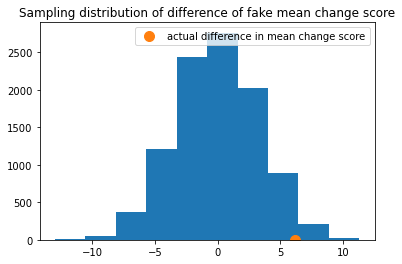

In [11]:
plt.hist(fake_differences)
plt.title('Sampling distribution of difference of fake mean change score')
plt.plot(actual_diff, 1, 'o', markersize = 10, label = 'actual difference in mean change score')
plt.legend();

We can also calculate a p-value, but calculating the proportion of fake mean differences which were as large or larger than the absolute value of the actual difference:

In [12]:
p_value = np.count_nonzero(fake_differences >= np.abs(actual_diff))/len(fake_differences)

print(p_value)

0.0283


# Permutation testing the difference in +/- proportions of the change scores, between the two groups

Another way of testing whether the drug is effective, is to look only at the direction of the changes in each group. This might be useful in situations where different groups have data that cannot be converted to comparable scales (e.g. counts of events that could not be converted to rates due to missing data etc.).

In the present example (and it can get a bit confusing) a negative change is what we want, as we want symptom severity to decrease.

If the drug is not effective, we would expect roughly equal amounts of positive and negative change scores in the drug group.

If the drug is no more effective than the placebo, we would expect the distribution of postive and negative change scores to be the same between the placebo and drug groups.

The placebo might be effective, because of the placebo effect. So we might expect more negative changes than positive changes in both groups. But if the drug is more effective than the placebo, we would expect the proportion of negative changes to be higher in the drug group than the placebo group. This would indicate a greater reduction in symptom severity in the drug group than in the placebo group.

First, let's write a function to convert the actual change scores to a string, either `+` or `-`, depending on the sign of the change score:

In [13]:
# Note: I've since learned np.sign() can be used to do this, though it will use 1 for positives and -1 for negatives instead 
# of the '+' and '-' which I've used here. It's generally preferred to use ints rather than strings if possible.

def change_score_to_sign(change_scores):
    
    # copy the input array, to avoid changing the original change scores
    change_scores_no_zeros = np.copy(change_scores)
    
    # take the input array, replace any positive values with `+` and any negative values with `-`
    output = np.where(change_scores_no_zeros > 0, '+', '-')
    
    return output

In [14]:
# testing the function on the placebo change scores
change_score_to_sign(placebo_change)

array(['+', '-', '-', '-', '+', '+', '-', '-', '+', '-', '+', '+', '-',
       '-', '-', '-', '+', '-', '+', '-', '-', '-', '-', '+', '-', '+',
       '+', '-', '-', '+', '-', '-', '+', '+', '+', '+', '+', '-', '+',
       '-', '-', '-', '-', '+', '+', '-', '-', '-', '-', '-', '+', '+',
       '+', '-', '-', '-', '+', '-', '-', '-', '-', '-', '+', '-', '+',
       '+', '+', '-', '-', '-', '+', '+', '-', '-', '+', '-', '+', '-',
       '-', '+'], dtype='<U1')

In [15]:
# running the function on the change scores of both groups, and storing the results as variables
placebo_change_signs = change_score_to_sign(placebo_change)

drug_change_signs = change_score_to_sign(drug_change)

In [16]:
print('Signs of the change scores for the placebo group:')
display(placebo_change_signs)

print('Signs of the change scores for the drug group:')
display(drug_change_signs)

Signs of the change scores for the placebo group:


array(['+', '-', '-', '-', '+', '+', '-', '-', '+', '-', '+', '+', '-',
       '-', '-', '-', '+', '-', '+', '-', '-', '-', '-', '+', '-', '+',
       '+', '-', '-', '+', '-', '-', '+', '+', '+', '+', '+', '-', '+',
       '-', '-', '-', '-', '+', '+', '-', '-', '-', '-', '-', '+', '+',
       '+', '-', '-', '-', '+', '-', '-', '-', '-', '-', '+', '-', '+',
       '+', '+', '-', '-', '-', '+', '+', '-', '-', '+', '-', '+', '-',
       '-', '+'], dtype='<U1')

Signs of the change scores for the drug group:


array(['+', '-', '-', '-', '-', '+', '-', '-', '-', '+', '-', '+', '-',
       '-', '-', '-', '-', '+', '-', '+', '+', '+', '-', '+', '-', '+',
       '-', '+', '-', '-', '+', '-', '-', '-', '-', '-', '+', '-', '-',
       '-', '-', '-', '+', '-', '-', '-', '-', '+', '-', '-', '-', '+',
       '+', '-', '-', '+', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '+', '-', '-', '+', '-', '+', '-', '+', '-', '-', '-', '-', '-',
       '-', '-'], dtype='<U1')

What we are interested in is whether the proportion of negative change scores differs between the placebo and drug group.

The proportions of negative change scores are calculated and plotted in the cell below:

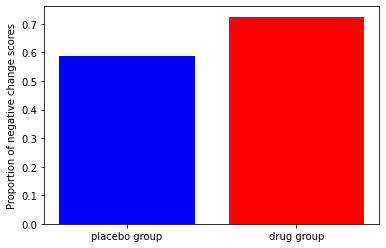

In [17]:
prop_neg_placebo = np.count_nonzero(placebo_change_signs == '-')/len(placebo_change_signs)

prop_neg_drug = np.count_nonzero(drug_change_signs == '-')/len(drug_change_signs)


plt.bar(['placebo group', 'drug group'], [prop_neg_placebo, prop_neg_drug], color = ['blue', 'red'])
plt.ylabel('Proportion of negative change scores');

It does appear that a greater proportion of the drug group had negative change scores, indicating a greater proportion of participants in the drug group experienced a reduction in symptom severity.

We can calculate the difference in these proportions:

In [18]:
actual_proportion_diff = prop_neg_placebo - prop_neg_drug

print('Difference in the proportion of negative change scores (placebo group - drug group) =',  actual_proportion_diff)

Difference in the proportion of negative change scores (placebo group - drug group) = -0.13749999999999996


We can permutation test this by shuffling the `+` and `-` labels around, under the null hypothesis that there is no difference in the proportion of negative change scores in each group:

In [19]:
# count the number of participants in the placebo group
n_placebo = len(placebo_change)

# pool the change score signs from each group
pooled = np.append(placebo_change_signs, drug_change_signs)

# set the number of iterations
n_iters = 10000

# create an array to store the fake proportion differences
fake_differences = np.zeros(n_iters)

# for 10,000 iterations...
for i in np.arange(n_iters):
    
    # shuffle the +/- change labels around
    shuffled = np.random.permutation(pooled)
    
    # create a fake placebo group from the shuffled labels
    fake_placebo_change_signs = shuffled[:n_placebo]
    
    # create a fake drug group from the shuffled labels
    fake_drug_change_signs = shuffled[n_placebo:]
    
    # caclulate the fake proportion of negative changes in the placebo group
    fake_prop_neg_placebo = np.count_nonzero(fake_placebo_change_signs == '-')/len(fake_placebo_change_signs)
    
    # caclulate the fake proportion of negative changes in the drug group
    fake_prop_neg_drug = np.count_nonzero(fake_drug_change_signs == '-')/len(fake_drug_change_signs)
    
    # store the fake proportion difference in the fake_differences array
    fake_differences[i] = fake_prop_neg_placebo - fake_prop_neg_drug


Again, we can plot the simulated sampling distribution, under the null hypothesis, of the difference in the proportion of negative change scores between the groups:

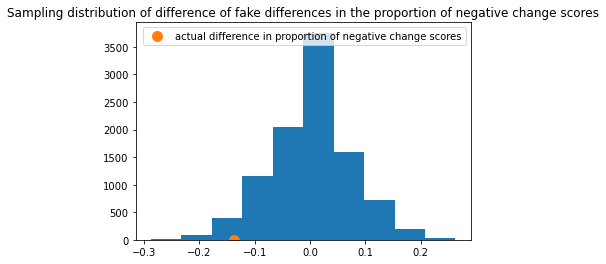

In [20]:
plt.hist(fake_differences)
plt.title('Sampling distribution of difference of fake differences in the proportion of negative change scores')
plt.plot(actual_proportion_diff, 1, 'o',  markersize = 10, label = 'actual difference in proportion of negative change scores')
plt.legend();

And we can calculate a p-value in the familiar way:

In [21]:
p_value = np.count_nonzero(fake_differences >= np.abs(actual_proportion_diff))/len(fake_differences)

print('p = ', p_value)

p =  0.05
